# 7-3: Implementation of LeNet

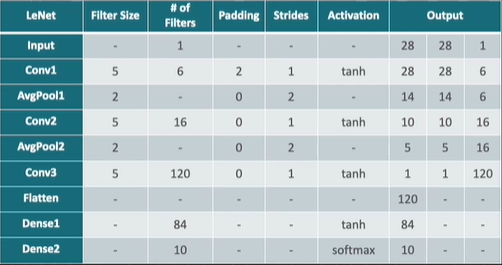

## Code 7-3-1: LeNet with Model Sub-classing

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

class LeNet(Model):
  def __init__(self):
    super(LeNet, self).__init__()

    self.conv1 = Conv2D(filters=6, kernel_size=5, padding='same',
                        activation='tanh')
    self.conv1_pool = AveragePooling2D(pool_size=2, strides=2)

    self.conv2 = Conv2D(filters=16, kernel_size=5, padding='valid',
                        activation='tanh')
    self.conv2_pool = AveragePooling2D(pool_size=2, strides=2)

    self.conv3 = Conv2D(filters=120, kernel_size=5, padding='valid',
                        activation='tanh')
    self.flatten = Flatten()

    self.dense1 = Dense(units=84, activation='tanh')
    self.dense2 = Dense(units=10, activation='softmax')

  def call(self,x):
    print("x: {}".format(x.shape))

    x = self.conv1(x)
    print("x: {}".format(x.shape))
    x = self.conv1_pool(x)
    print("x: {}".format(x.shape))

    x = self.conv2(x)
    print("x: {}".format(x.shape))
    x = self.conv2_pool(x)
    print("x: {}".format(x.shape))

    x = self.conv3(x)
    print("x: {}".format(x.shape))
    x = self.flatten(x)
    print("x: {}".format(x.shape))

    x = self.dense1(x)
    print("x: {}".format(x.shape))
    x = self.dense2(x)
    print("x: {}".format(x.shape))
    return x

model = LeNet()

x = tf.random.normal(shape=(32,28,28,1))
predictions = model(x)

x: (32, 28, 28, 1)
x: (32, 28, 28, 6)
x: (32, 14, 14, 6)
x: (32, 10, 10, 16)
x: (32, 5, 5, 16)
x: (32, 1, 1, 120)
x: (32, 120)
x: (32, 84)
x: (32, 10)


## Code 7-3-2: LeNet with Hybrid Method


In [11]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

class ConvLayer(Layer):
  def __init__(self, filters, padding, pool=True):
    super(ConvLayer, self).__init__()
    self.pool = pool

    self.conv = Conv2D(filters=6, kernel_size=5, padding='same',
                       activation='tanh')
    if pool == True:
      self.conv_pool = AveragePooling2D(pool_size=2, strides=2)

  def call(self,x):
    x = self.conv(x)
    if self.pool == True:
      x = self.conv_pool(x)
    return x

class LeNet(Model):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = ConvLayer(filters=6, padding='same')
    self.conv2 = ConvLayer(filters=16, padding='same')
    self.conv3 = ConvLayer(filters=120, padding='False')
    self.flatten = Flatten()

    self.dense1 = Dense(units=84, activation='tanh')
    self.dense2 = Dense(units=10, activation='softmax')

  def call(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.flatten(x)

    x = self.dense1(x)
    x = self.dense2(x)
    return x

model = LeNet()

x = tf.random.normal(shape=(32,28,28,1))
predictions = model(x)

## Forward Propagation of LeNet

In [29]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import mnist

from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Lenet Implementaiton #
class ConvLayer(Layer):
  def __init__(self, filters, padding, pool=True):
    super(ConvLayer, self).__init__()
    self.pool = pool

    self.conv = Conv2D(filters=6, kernel_size=5, padding='same',
                       activation='tanh')
    if pool == True:
      self.conv_pool = AveragePooling2D(pool_size=2, strides=2)

  def call(self,x):
    x = self.conv(x)
    if self.pool == True:
      x = self.conv_pool(x)
    return x

class LeNet(Model):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = ConvLayer(filters=6, padding='same')
    self.conv2 = ConvLayer(filters=16, padding='same')
    self.conv3 = ConvLayer(filters=120, padding='False')
    self.flatten = Flatten()

    self.dense1 = Dense(units=84, activation='tanh')
    self.dense2 = Dense(units=10, activation='softmax')

  def call(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.flatten(x)

    x = self.dense1(x)
    x = self.dense2(x)
    return x

# Dataset Preparation #
(train_images, train_labels), _ = mnist.load_data()
train_images = np.expand_dims(train_images, axis=3).astype(np.float32)
train_labels = train_labels.astype(np.int32)

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.batch(32)

# Forward Propagation #
model = LeNet()
loss_object = SparseCategoricalCrossentropy()

for images, labels in train_ds:
  predictions = model(images)
  loss = loss_object(labels, predictions)
  print(loss)

  break

tf.Tensor(2.3029149, shape=(), dtype=float32)
